In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_excel("dataset.xlsx", sheet_name='VU', skiprows=[0,2], usecols=lambda x: 'Unnamed' not in x)
rows, columns = df.shape

c:\Users\nikit\Desktop\NeuralNetworks\venv\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [4]:
def replaceNonNumeric(x):
    try:
        float(x)
        return x
    except:
        return np.nan  
df = df.applymap(replaceNonNumeric)

In [5]:
rows_for_drop = []
for row in range(rows):
    if np.isnan(df['КГФ'][row]) and np.isnan(df['КГФ.1'][row]) and np.isnan(df['G_total'][row]):
        rows_for_drop.append(row)
df = df.drop(rows_for_drop)
df = df.reset_index()
df = df.drop(columns=['index'])
rows, columns = df.shape

In [6]:
for row in range(rows):
    if np.isnan(df['КГФ'][row]):
        df['КГФ'][row] = 1000 * df['КГФ.1'][row]
df = df.drop(columns=['Pсб', 'КГФ.1'])
rows, columns = df.shape

In [7]:
df.columns

Index(['Глубина манометра', 'Dшт', 'Руст', 'Рзаб', 'Pлин', 'Руст.1', 'Рзаб.1',
       'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб', 'Tлин', 'Дебит газа',
       'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси', 'Дебит гааз',
       'Дебит кон нестабильный', 'Дебит воды.1', 'Нэф',
       'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)',
       'Рпл. Тек (Карноухов)', 'Pсб.1', 'Ro_g', 'Ro_c', 'Ro_w',
       'Удельная плотность газа ', 'G_total', 'КГФ'],
      dtype='object')

In [8]:
df

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,3576.3,7.94,249.600000,370.100000,101.800000,249.000000,359.6,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25000,56.5000,NaN,92.376018,0.806017,801.00,1000.0,0.669449,2.782623,311.909400
1,3576.3,9.53,233.500000,364.600000,101.300000,231.000000,338.1,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25000,56.5000,NaN,91.685171,0.806017,801.00,1000.0,0.669449,3.697781,288.600300
2,3576.3,11.11,213.400000,357.100000,101.600000,211.000000,314.8,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25000,56.5000,NaN,90.204787,0.806017,801.00,1000.0,0.669449,4.515073,248.790600
3,3576.3,12.70,191.600000,347.400000,98.400000,187.000000,291.5,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25000,56.5000,NaN,88.033555,0.806017,801.00,1000.0,0.669449,5.217673,223.559100
4,3576.3,14.29,171.900000,337.700000,99.200000,169.000000,270.3,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25000,56.5000,NaN,88.527017,0.806017,801.00,1000.0,0.669449,5.765092,215.148600
5,3576.3,9.53,199.500000,286.400000,106.361669,199.500000,286.6,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.0,0.6,56.8000,41.22431,48.3000,NaN,89.513940,0.812700,789.80,1000.0,0.675000,3.076542,241.130794
6,3667.0,7.94,252.000000,354.333525,102.932004,252.000000,354.2,101.565484,56.0,NaN,105.300,32.997275,234.857429,56.068587,0.000000,261.281260,1807.400000,90.4,0.0,57.2000,38.74000,50.8596,50.1,99.580558,NaN,787.00,NaN,0.659000,NaN,188.000000
7,3667.0,9.53,250.000000,350.200000,103.186902,250.000000,349.1,103.322581,61.0,NaN,105.200,39.060921,326.224449,73.887158,0.000000,362.084737,2532.400000,118.0,0.0,57.2000,38.74000,50.8596,50.1,98.791019,NaN,787.00,NaN,0.659000,NaN,178.000000
8,3667.0,11.11,240.000000,344.000000,105.671499,240.000000,344.1,105.588710,65.0,NaN,105.200,44.896592,429.722850,92.126725,1.014583,476.204797,3392.300000,146.0,1.0,57.2000,38.74000,50.8596,50.1,100.666173,NaN,787.00,NaN,0.659000,NaN,169.000000
9,3667.0,12.70,228.000000,336.700000,108.100063,228.000000,343.0,108.144839,42.0,NaN,105.100,49.839872,532.283025,109.812176,1.378418,589.142653,4228.800000,175.5,1.4,57.2000,38.74000,50.8596,50.1,102.442635,NaN,787.00,NaN,0.659000,NaN,162.000000


In [9]:
params = pd.DataFrame()
params.index = ['Количество', '% пропусков', 'Минимум', 'Среднее', 'Максимум', 'Стандартное отклонение', 'Мощность', 'Первый квартиль', 'Медиана', 'Третий квартиль', 'IQR']
for column in df.columns:
    params[column] = [len(df[column]), df[column].isna().sum() * 100 / len(df[column]), df[column].min(), df[column].mean(), df[column].max(), df[column].std(), df[column].nunique(), df[column].quantile(0.25), df[column].quantile(0.5), df[column].quantile(0.75), df[column].quantile(0.25) - df[column].quantile(0.75)]

params = params.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:limegreen" if i!=1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:steelblue" if i<60 and i >= 30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:limegreen" if i<30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None)))
params

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит смеси,Дебит гааз,Дебит кон нестабильный,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
Количество,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
% пропусков,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,3.225806,0.000000,0.000000,35.483871,3.225806,0.000000,0.000000,0.000000,0.000000,4.301075,0.000000,0.000000,0.000000,0.000000,5.376344,12.903226,31.182796,0.000000,75.268817,0.000000,75.268817,0.000000,75.268817,0.000000
Минимум,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,14.000000,100.210000,16.204686,128.365641,33.629767,0.000000,136.815245,884.000000,59.800000,0.000000,30.000000,29.170000,39.900000,41.600000,84.381939,0.787416,186.000000,1000.000000,0.570000,2.782623,131.000000
Среднее,3524.086667,10.951183,228.293412,331.762255,99.860962,227.644269,330.334444,98.005453,56.172043,43.091667,104.961400,39.798184,394.402772,99.909533,2.132827,417.021121,3282.971050,164.151613,2.163441,52.703325,40.682881,50.943684,50.773438,93.917953,0.807631,780.847527,1000.000000,0.665260,5.742359,201.705968
Максимум,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,110.200000,107.071000,55.513904,846.816143,302.621077,8.340288,896.908271,6943.100000,492.800000,8.100000,72.539800,53.270000,56.700000,56.800000,102.640020,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949
Стандартное отклонение,144.474862,2.423172,41.897238,56.481235,7.300663,41.757127,56.357493,12.425851,11.250781,19.602337,1.250941,8.937669,150.354801,49.140664,1.874972,157.746532,1353.043667,85.225100,1.903132,12.149424,5.374353,4.378416,4.006591,5.068897,0.015076,62.795111,0.000000,0.020485,2.112717,49.253925
Мощность,20.000000,10.000000,87.000000,88.000000,91.000000,73.000000,89.000000,88.000000,51.000000,57.000000,68.000000,89.000000,93.000000,92.000000,77.000000,89.000000,92.000000,90.000000,42.000000,14.000000,21.000000,18.000000,13.000000,70.000000,6.000000,25.000000,1.000000,21.000000,23.000000,72.000000
Первый квартиль,3427.625000,9.530000,201.636750,297.797500,95.945951,200.000000,294.625000,95.335032,50.300000,33.300000,104.525000,33.688653,287.950295,69.900000,0.700000,306.243434,2223.000000,116.800000,0.700000,44.200000,37.210000,48.300000,49.425000,89.513940,0.787416,782.000000,1000.000000,0.660000,4.381813,164.000000
Медиана,3579.000000,11.110000,229.894737,337.789172,100.800000,228.000000,334.250000,100.260000,58.000000,38.700000,105.110000,40.519491,383.719622,89.800000,1.400000,401.391397,3112.000000,143.500000,1.400000,56.800000,39.466050,50.800000,50.900000,92.968172,0.806017,787.000000,1000.000000,0.667000,5.250915,192.000000
Третий квартиль,3652.250000,12.700000,252.000000,364.150000,103.865199,252.000000,362.150000,104.000000,64.000000,46.375000,105.567500,47.800000,489.673000,117.600000,3.200000,509.046953,4165.000000,185.200000,3.300000,63.500000,42.860000,55.400000,52.700000,98.494942,0.821344,793.700000,1000.000000,0.679000,6.125723,224.000000


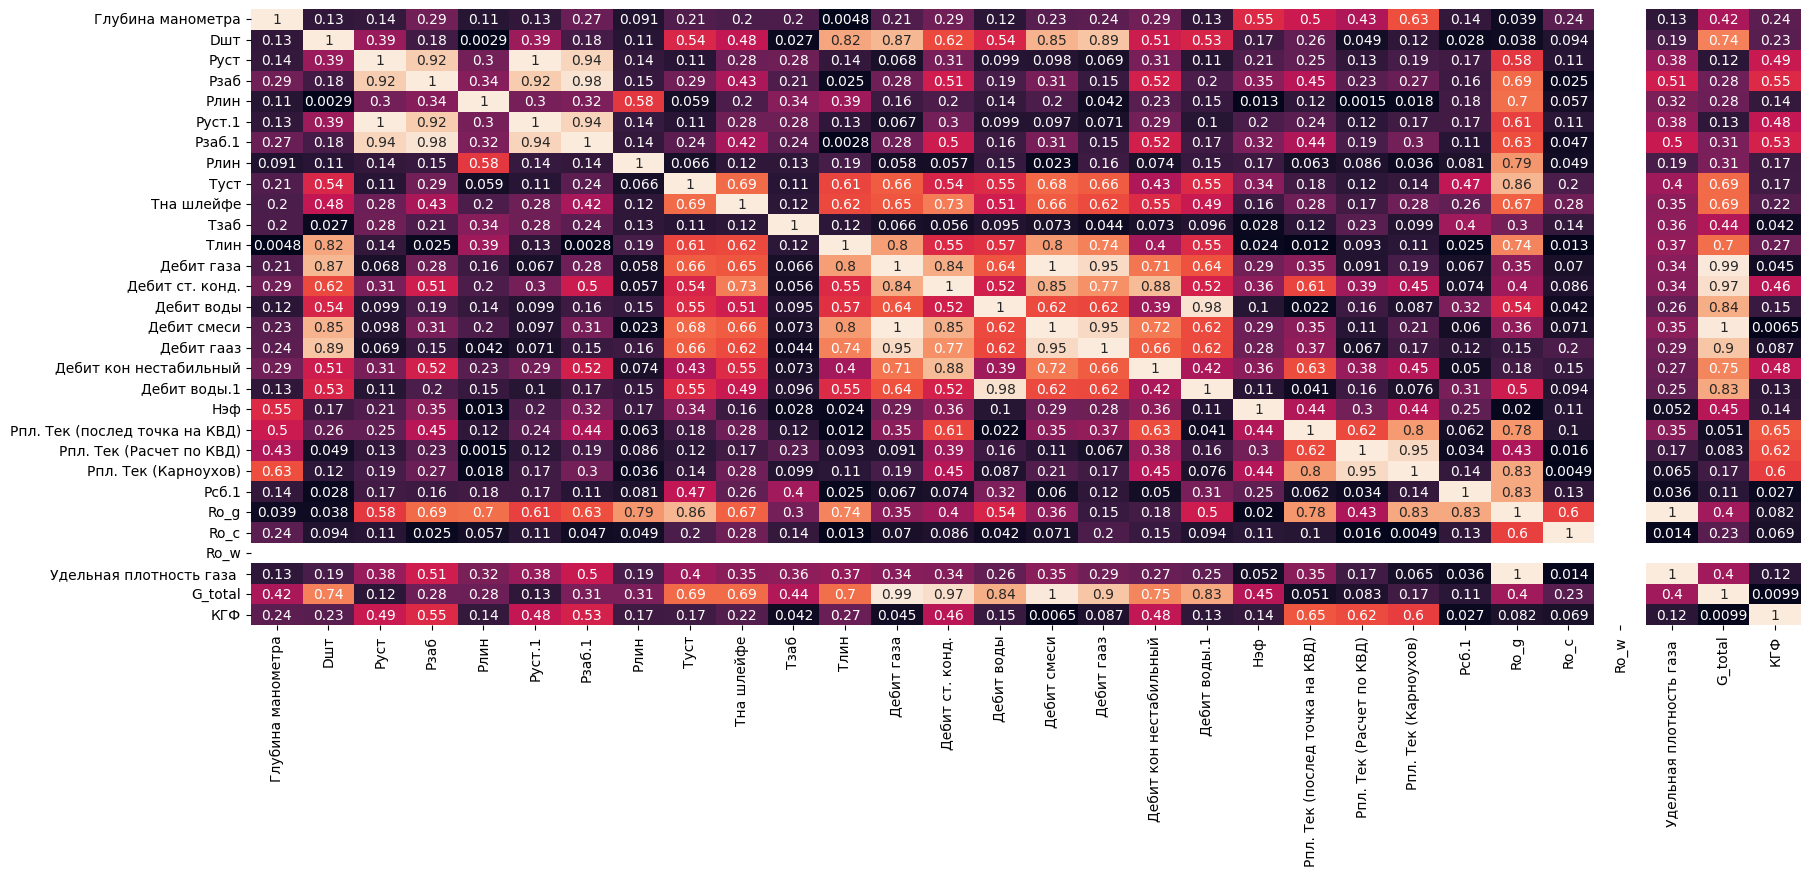

In [10]:
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(abs(df.corr()), annot=True, ax=ax, cbar=False)
plt.show()

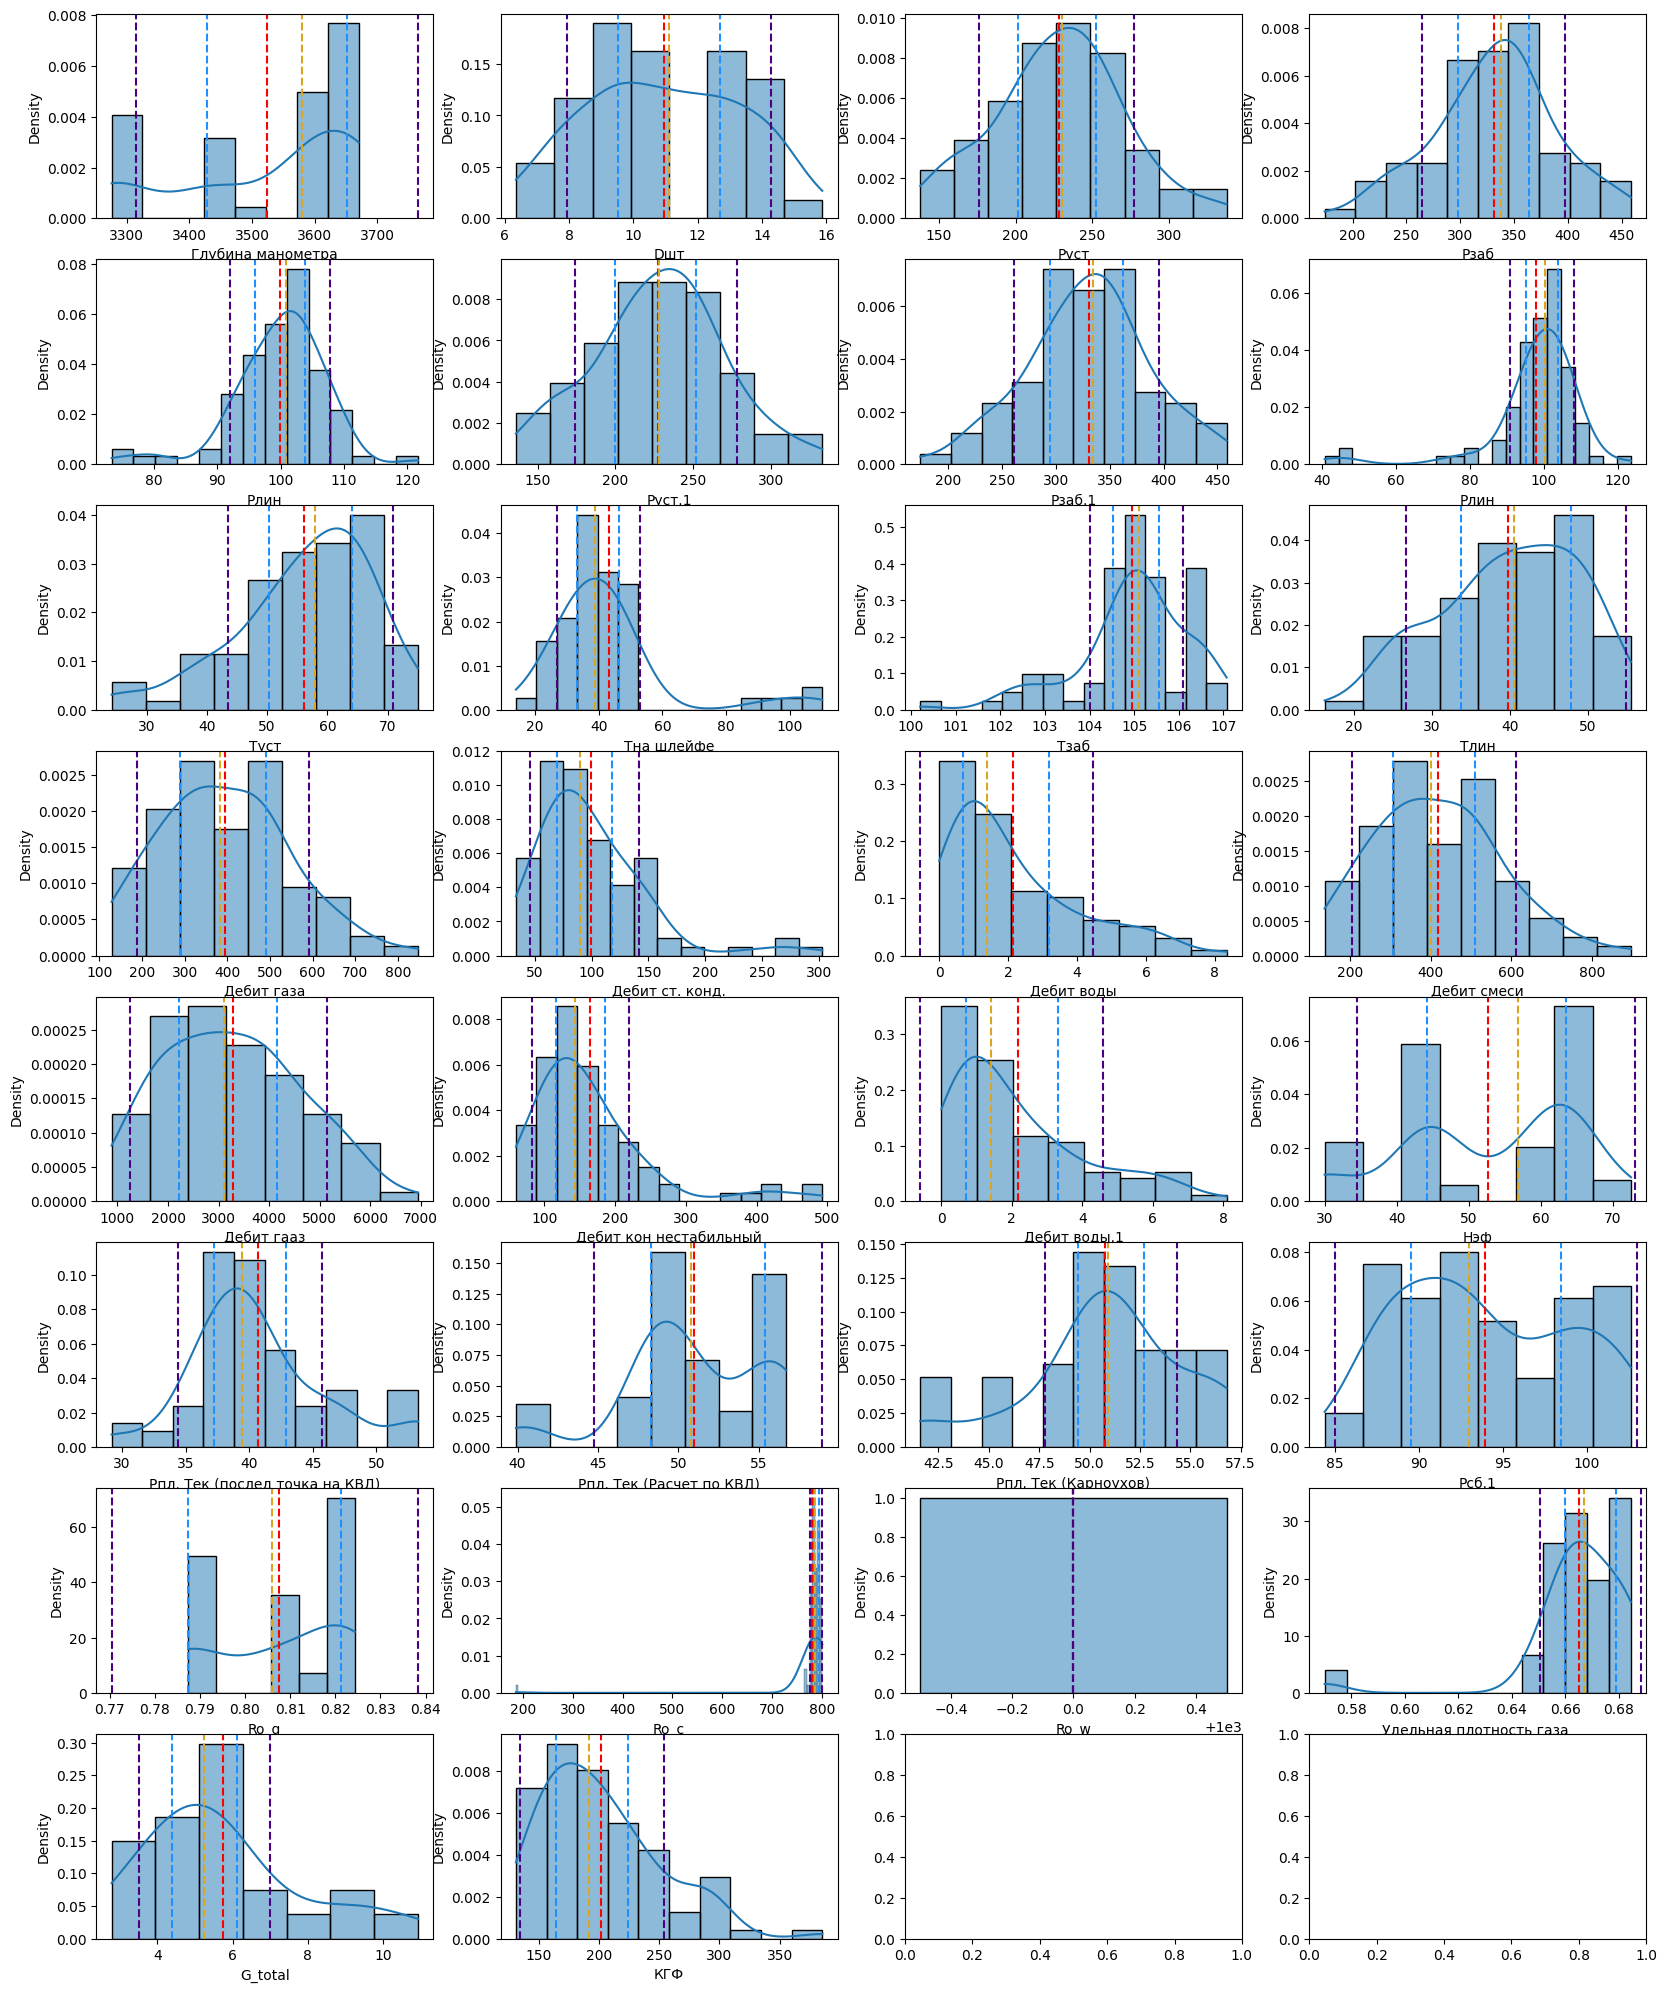

In [11]:
if columns % 4 == 0:
    f, ax = plt.subplots(int(columns // 4), 4, figsize=(20,25))
else:
    f, ax = plt.subplots(int(columns // 4) + 1, 4, figsize=(20,25))

i = 0
j = 0
for column in df.columns:
    if j == 4:
        j = 0
        i += 1

    sns.histplot(df[column], ax=ax[i, j], kde=True, stat="density")

    ax[i, j].axvline(df[column].quantile(0.25)-1.5*(df[column].quantile(0.25) - df[column].quantile(0.75)), color="indigo",     ls='--')
    ax[i, j].axvline(df[column].quantile(0.25),                                                             color="dodgerblue", ls='--')
    ax[i, j].axvline(df[column].mean(),                                                                     color="red",        ls='--')
    ax[i, j].axvline(df[column].quantile(0.5),                                                              color="goldenrod",  ls='--')
    ax[i, j].axvline(df[column].quantile(0.75),                                                             color="dodgerblue", ls='--')
    ax[i, j].axvline(df[column].quantile(0.75)+1.5*(df[column].quantile(0.25) - df[column].quantile(0.75)), color="indigo",     ls='--')

    j += 1

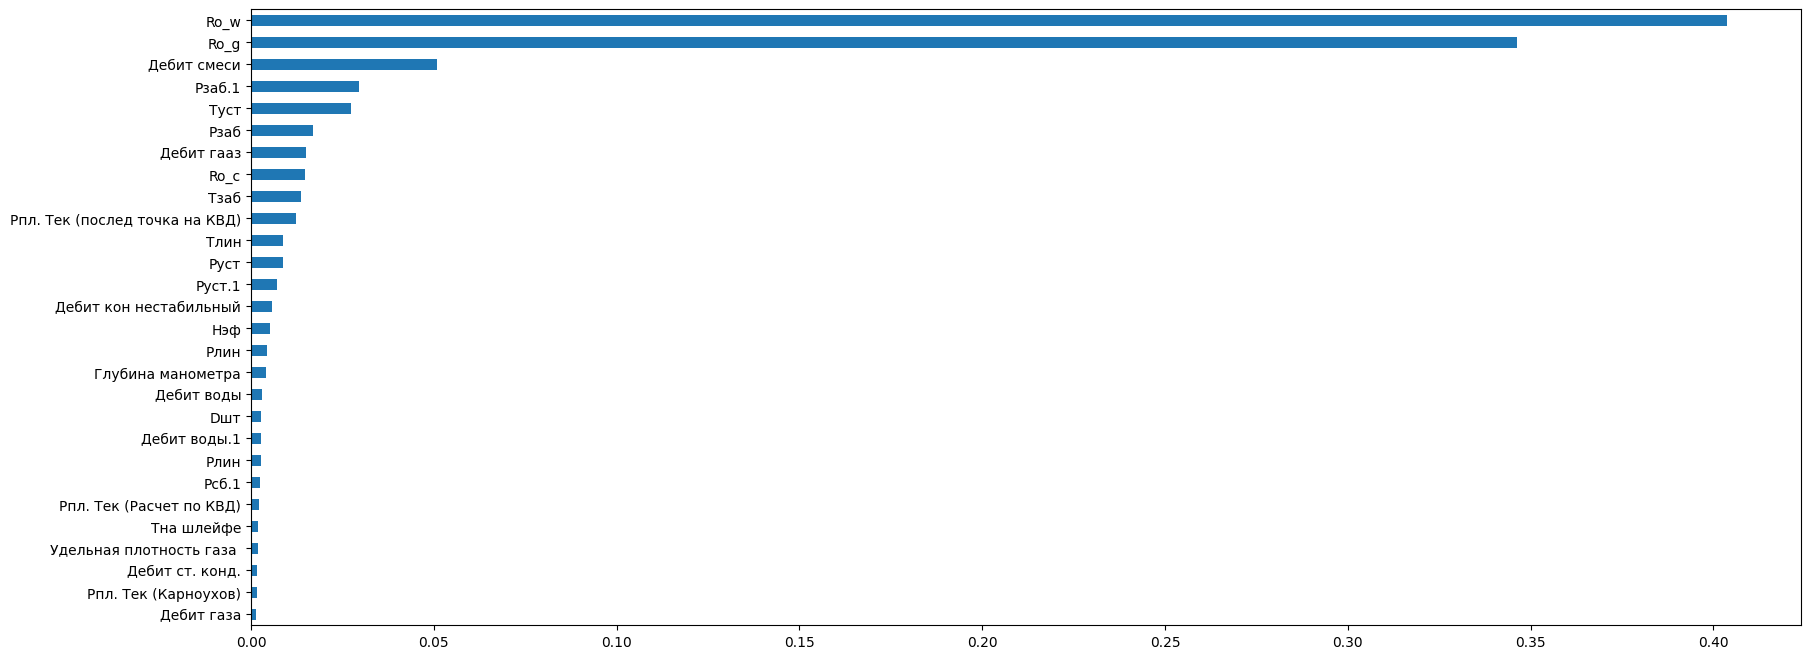

In [12]:
X = df[df.columns[:-2]].fillna(-100)
y = df[df.columns[-2:]].fillna(-100)

rfr = RandomForestRegressor()
rfr.fit(X, y)

imp = pd.Series(rfr.feature_importances_, X.columns[0:len(X.columns)]).sort_values()
plt.figure(figsize=(20,8))
imp.plot(kind='barh')
plt.show()

In [13]:
df = df.drop(columns=['Ro_w', 'Ro_g',
                'Рпл. Тек (Расчет по КВД)', 'Рпл. Тек (Карноухов)',
                'Руст', 'Руст.1', 'Рзаб.1',
                'Дебит гааз', 'Дебит воды.1', 'Дебит смеси',
                'Pлин', 'Рлин', 'Pсб.1',
                'Глубина манометра', 'Тна шлейфе', 'Нэф'])

In [14]:
df.columns

Index(['Dшт', 'Рзаб', 'Туст', 'Тзаб', 'Tлин', 'Дебит газа', 'Дебит ст. конд.',
       'Дебит воды', 'Дебит кон нестабильный',
       'Рпл. Тек (послед точка на КВД)', 'Ro_c', 'Удельная плотность газа ',
       'G_total', 'КГФ'],
      dtype='object')

In [15]:
df

,Dшт,Рзаб,Туст,Тзаб,Tлин,Дебит газа,Дебит ст. конд.,Дебит воды,Дебит кон нестабильный,Рпл. Тек (послед точка на КВД),Ro_c,Удельная плотность газа,G_total,КГФ
0,7.94,370.100000,53.0,103.200,32.500000,214.704000,83.600000,0.400000,131.3,45.25000,801.00,0.669449,2.782623,311.909400
1,9.53,364.600000,58.8,103.000,38.600000,290.594000,104.700000,1.400000,158.5,45.25000,801.00,0.669449,3.697781,288.600300
2,11.11,357.100000,63.6,102.600,43.400000,368.042000,114.300000,1.900000,172.3,45.25000,801.00,0.669449,4.515073,248.790600
3,12.70,347.400000,64.7,102.000,46.100000,434.663000,121.300000,3.300000,181.5,45.25000,801.00,0.669449,5.217673,223.559100
4,14.29,337.700000,64.0,104.400,49.900000,483.283000,129.800000,4.600000,190.6,45.25000,801.00,0.669449,5.765092,215.148600
5,9.53,286.400000,57.5,102.640,38.979712,251.700000,76.800000,0.600000,119.0,41.22431,789.80,0.675000,3.076542,241.130794
6,7.94,354.333525,56.0,105.300,32.997275,234.857429,56.068587,0.000000,90.4,38.74000,787.00,0.659000,NaN,188.000000
7,9.53,350.200000,61.0,105.200,39.060921,326.224449,73.887158,0.000000,118.0,38.74000,787.00,0.659000,NaN,178.000000
8,11.11,344.000000,65.0,105.200,44.896592,429.722850,92.126725,1.014583,146.0,38.74000,787.00,0.659000,NaN,169.000000
9,12.70,336.700000,42.0,105.100,49.839872,532.283025,109.812176,1.378418,175.5,38.74000,787.00,0.659000,NaN,162.000000


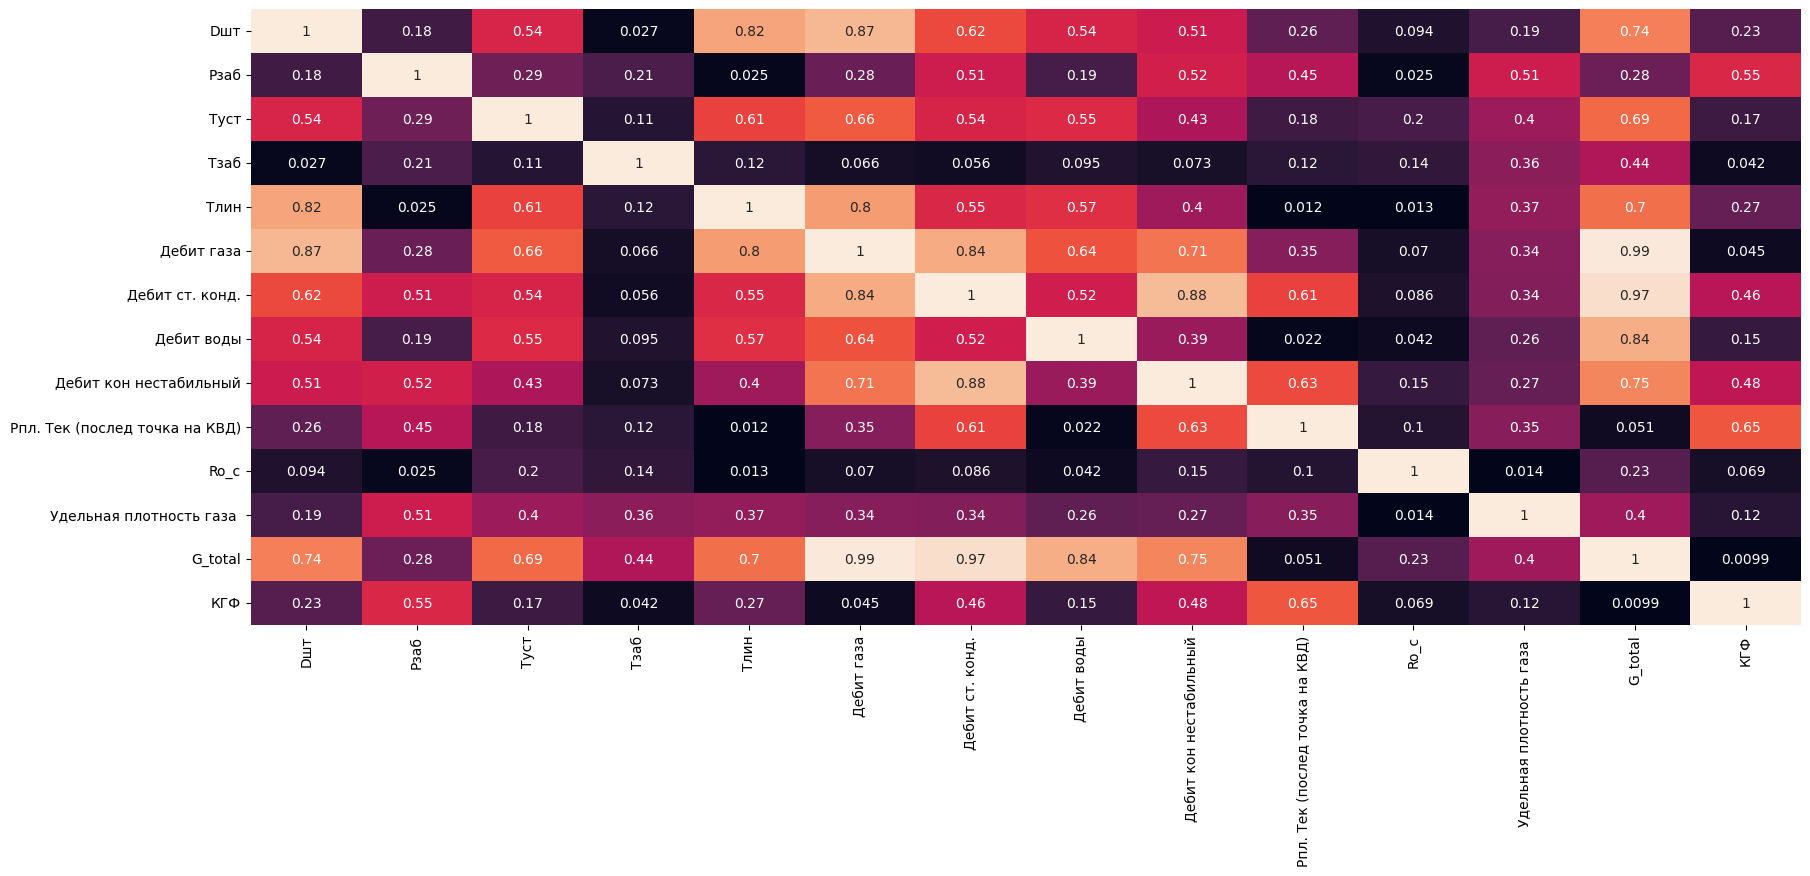

In [16]:
f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(abs(df.corr()), annot=True, ax=ax, cbar=False)
plt.show()